# Import Modules

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import optuna
import missingno as msno
import warnings
import pickle

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from scipy.stats import yeojohnson, boxcox
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.optimizers import Adam
from sklearn.pipeline import Pipeline

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
SEED = 42

# Load Dataset

In [3]:
df = pd.read_csv("Data/fraud_oracle/fraud_oracle.csv")

In [4]:
df.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,...,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,...,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,...,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


# **A. Statistik Deskriptif**


  Statistik deskriptif, seperti yang diberikan oleh fungsi `df.describe()` dan `df.info()` dalam `pandas`, memainkan peran penting dalam memahami karakteristik dasar dari data secara cepat dan efisien. Dengan menyediakan informasi kunci seperti rata-rata, standar deviasi, nilai minimum dan maksimum, jumlah nilai kosong, serta tipe data, statistik ini membantu mengidentifikasi pola, tren, dan anomali dalam dataset. Ini memungkinkan deteksi outlier dan pengecekan kualitas data, seperti konsistensi tipe data dan keberadaan nilai yang hilang. Manfaat ini sangat penting untuk merencanakan langkah-langkah analisis atau tindakan preprocessing selanjutnya, seperti pengisian data yang hilang atau normalisasi data, sehingga mendukung pengambilan keputusan yang lebih baik dan meningkatkan kualitas analisis data secara keseluruhan.

In [5]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

# **B. Exploratory Data Analysis**


## 1. Distribusi Data

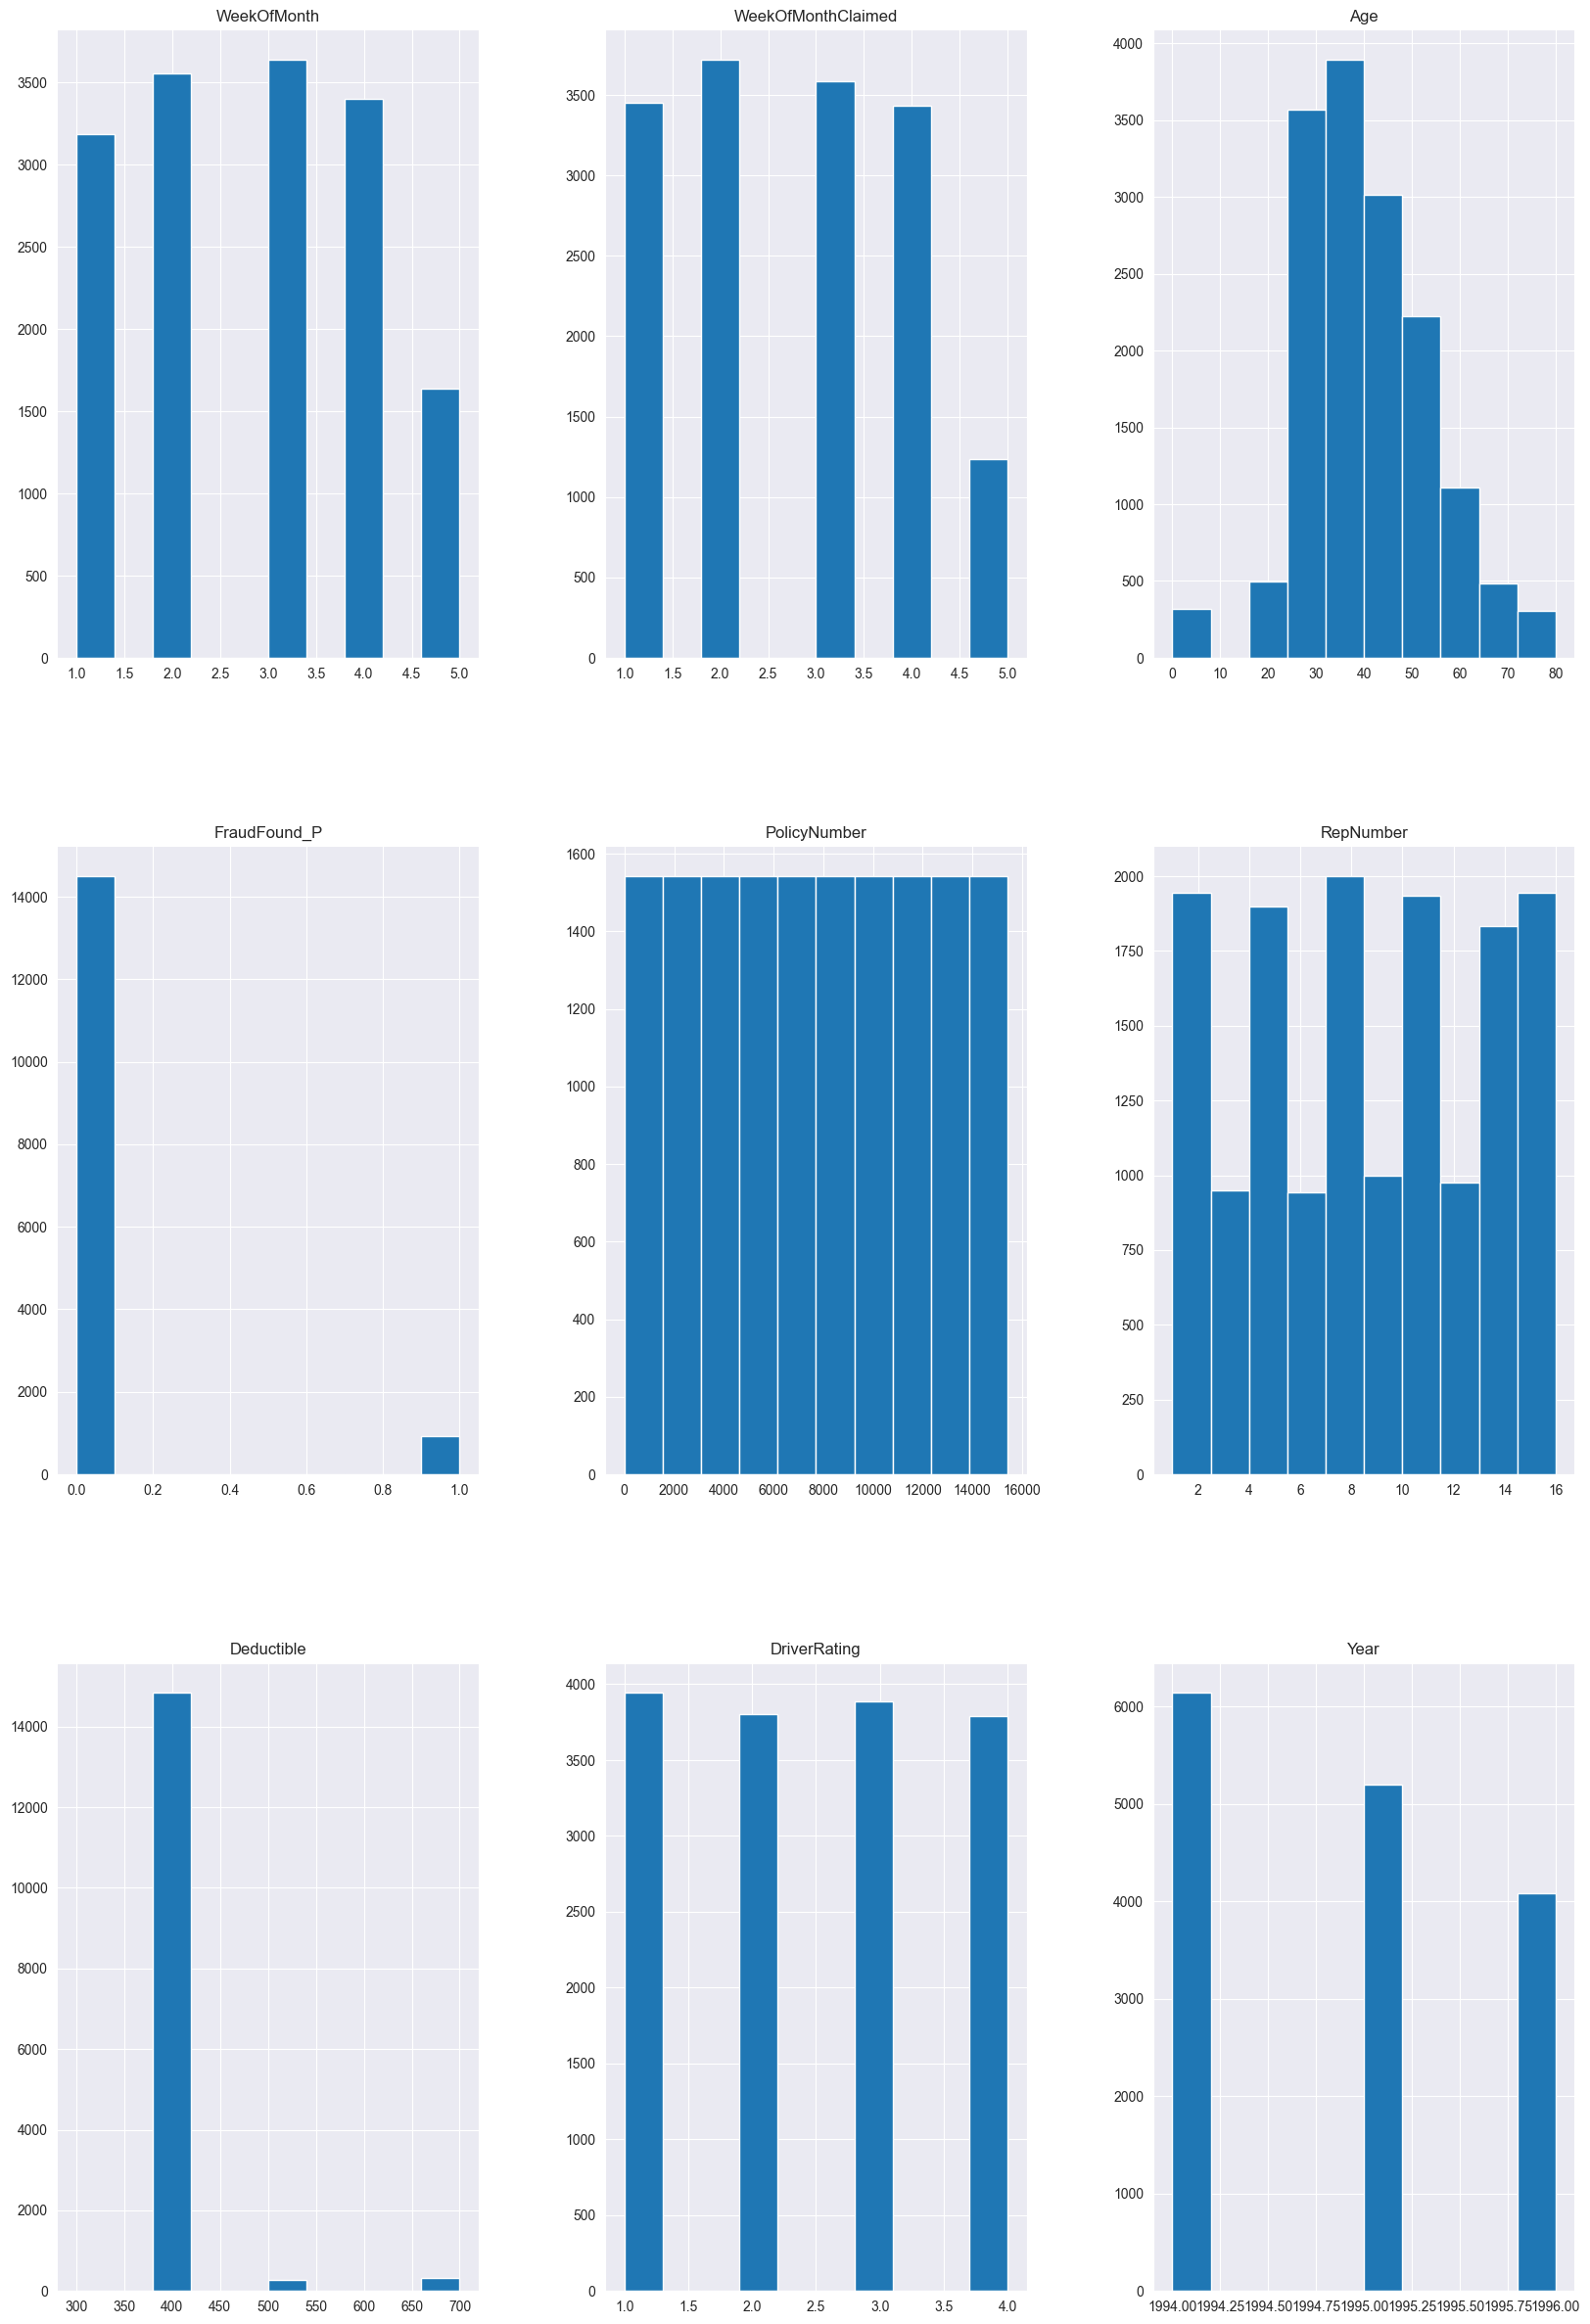

In [7]:
df.hist(figsize=(20, 30))
plt.show()

## 2. Frekuensi Kelas 

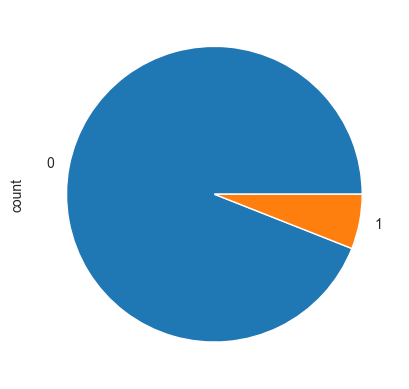

In [8]:
df['FraudFound_P'].value_counts().plot(kind='pie')
plt.show()

# **C. Missing Value**

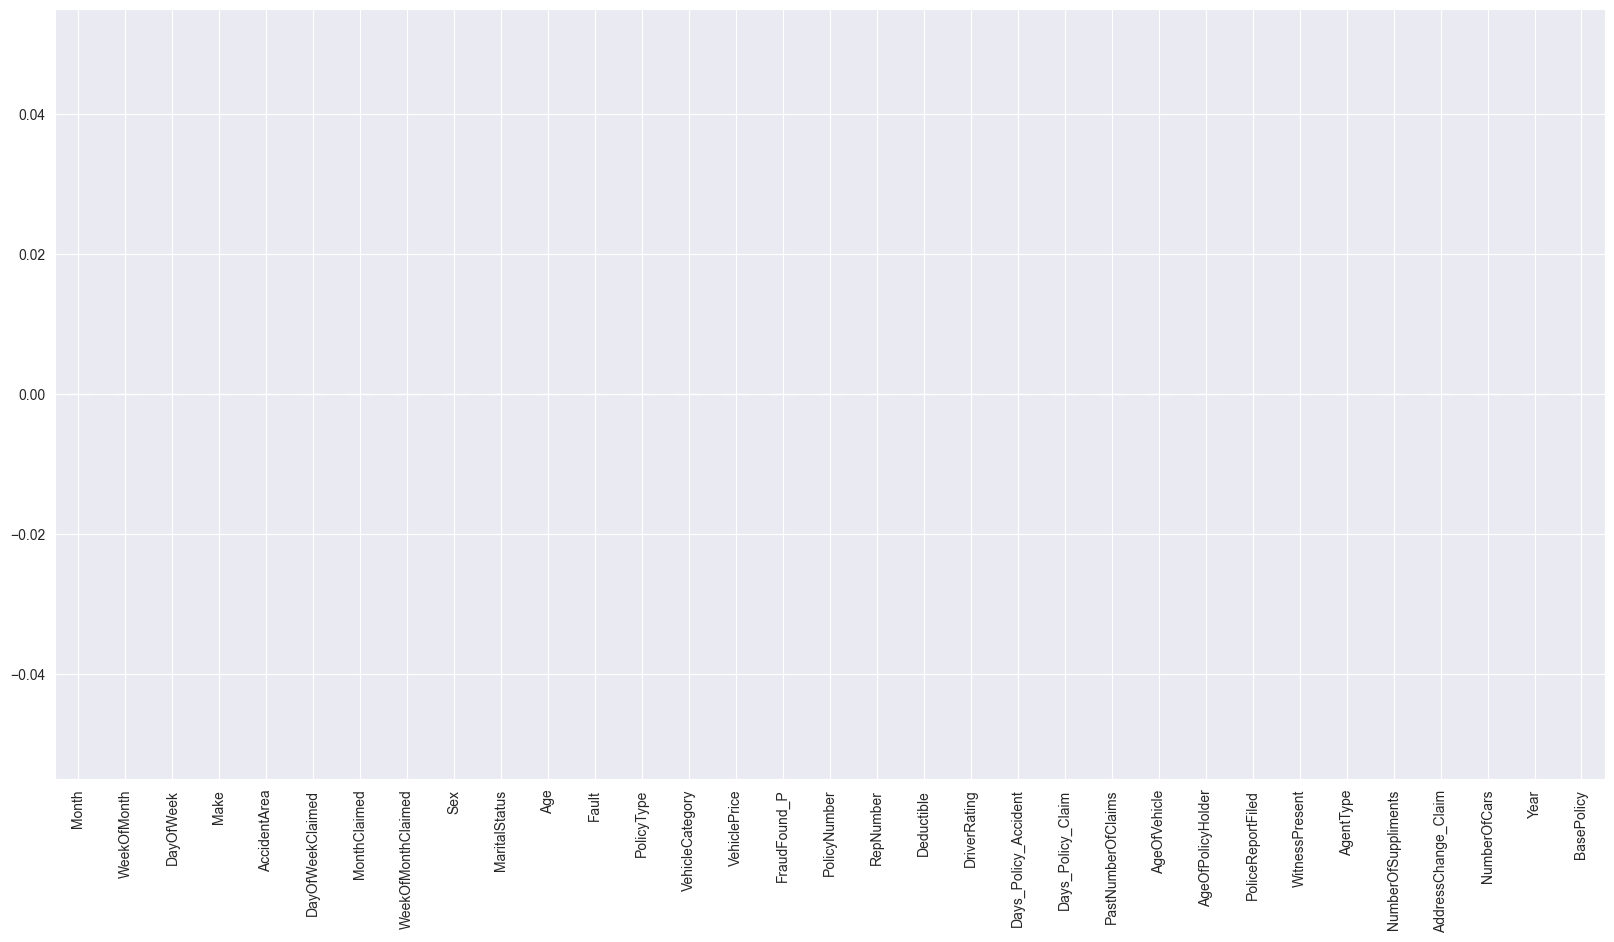

In [9]:
plt.figure(figsize=(20,10))
df.isnull().sum().plot(kind='bar')
plt.show()

# D. Heatmap Correlation

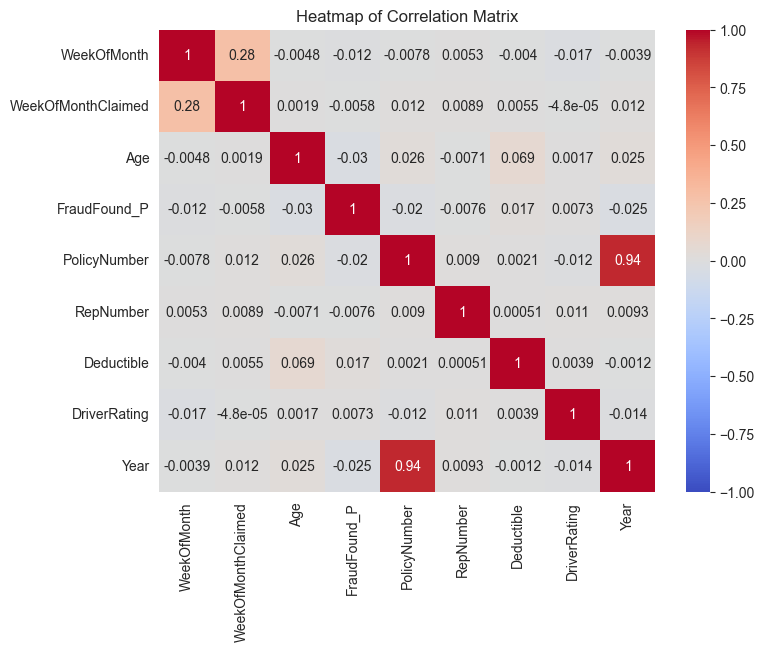

In [10]:
df_num = df.select_dtypes(include=['float64', 'int64'])
corr = df_num.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()


# Categorical Encoding

## 1. One Hot Encoding

In [11]:
onehot_columns = ['AccidentArea', 'Sex', 'Fault', 'RepNumber', 'PoliceReportFiled',  'WitnessPresent', 'AgentType', 'PolicyType' ]

In [12]:
df_onehot = pd.get_dummies(df, columns=onehot_columns, prefix=onehot_columns, prefix_sep='_', drop_first=True, dtype=int)

## 2. Ordinal Encoding

In [13]:
mapping_dict = {
    'MaritalStatus': {
        'Single': 0,
        'Married': 1,
        'Divorced': 2,
        'Widow': 3
    },
    'Days_Policy_Accident': {
        'more than 30': 4,
        'none': 0,
        '8 to 15': 2,
        '15 to 30': 3,
        '1 to 7': 1
    },
    'Days_Policy_Claim': {
        'more than 30': 3,
        '15 to 30': 2,
        '8 to 15': 1,
        'none': 0
    },
    'PastNumberOfClaims': {
        '2 to 4': 2,
        'none': 0,
        '1': 1,
        'more than 4': 3
    },
    'AgeOfVehicle': {
        'new': 0,
        '2 years': 1,
        '3 years': 2,
        '4 years': 3,
        '5 years': 4,
        '6 years': 5,
        '7 years': 6,
        'more than 7': 7
    },
    'AgeOfPolicyHolder': {
        '16 to 17': 0,
        '18 to 20': 1,
        '21 to 25': 2,
        '26 to 30': 3,
        '31 to 35': 4,
        '36 to 40': 5,
        '41 to 50': 6,
        '51 to 65': 7,
        'over 65': 8
    },
    'NumberOfSuppliments': {
        'none': 0,
        '1 to 2': 1,
        '3 to 5': 2,
        'more than 5': 3
    },
    'AddressChange_Claim': {
        'no change': 4,
        '4 to 8 years': 3,
        '2 to 3 years': 2,
        '1 year': 1,
        'under 6 months': 0
    },
    'NumberOfCars': {
        '1 vehicle': 1,
        '2 vehicles': 2,
        '3 to 4': 3,
        '5 to 8': 4,
        'more than 8': 5
    },
    'VehiclePrice': {
        'less than 20000': 1,
        '20000 to 29000': 2,
        '30000 to 39000': 3,
        '40000 to 59000': 4,
        '60000 to 69000': 5,
        'more than 69000': 6
    },
    'DayOfWeek': {
        'Monday': 0,
        'Tuesday': 1,
        'Wednesday': 2,
        'Thursday': 3,
        'Friday': 4,
        'Saturday': 5,
        'Sunday': 6
    },
    'DayOfWeekClaimed': {
        '0':0,
        'Monday': 1,
        'Tuesday': 2,
        'Wednesday': 3,
        'Thursday': 4,
        'Friday': 5,
        'Saturday': 6,
        'Sunday': 7
    },
    'MonthClaimed': {
        '0':0,
        'Jan': 1,
        'Feb': 2,
        'Mar': 3,
        'Apr': 4,
        'May': 5,
        'Jun': 6,
        'Jul': 7,
        'Aug': 8,
        'Sep': 9,
        'Oct': 10,
        'Nov': 11,
        'Dec': 12
    },
    'Month': {
        'Jan': 0,
        'Feb': 1,
        'Mar': 2,
        'Apr': 3,
        'May': 4,
        'Jun': 5,
        'Jul': 6,
        'Aug': 7,
        'Sep': 8,
        'Oct': 9,
        'Nov': 10,
        'Dec': 11
    }
}


for kolom, mapping in mapping_dict.items():
    df_onehot[kolom] = df_onehot[kolom].map(mapping)

# Feature Engineering

In [14]:
df_onehot.drop(columns=['Make', 'PolicyNumber', 'VehicleCategory', 'BasePolicy'], inplace=True)

In [15]:
df_onehot['Age_DriverRating_Interact'] = df_onehot['Age'] * df_onehot['DriverRating']  # Menangkap efek interaksi antara usia dan rating pengemudi.
df_onehot['Deductible_VehiclePrice_Ratio'] = df_onehot['Deductible'] / df_onehot['VehiclePrice']  # Menilai rasio deductible terhadap harga kendaraan.
df_onehot['Days_Policy_Interact'] = df_onehot['Days_Policy_Accident'] + df_onehot['Days_Policy_Claim']  # Menggabungkan hari kecelakaan dan klaim polis untuk menangkap efek durasi keseluruhan polis.
df_onehot['AgeOfPolicyHolder_Polynomial'] = df_onehot['AgeOfPolicyHolder'] ** 2  # Mengeksplorasi efek non-linear dari usia pemegang polis.
df_onehot['AgeDiff_PolicyHolder_Vehicle'] = df_onehot['AgeOfPolicyHolder'] - df_onehot['AgeOfVehicle']  # Mengukur perbedaan usia antara pemegang polis dan kendaraan.
df_onehot['Suppliments_Cars_Ratio'] = df_onehot['NumberOfSuppliments'] / df_onehot['NumberOfCars']  # Mengevaluasi rasio jumlah suplemen terhadap jumlah mobil.
df_onehot['AgeDiff_Vehicle_PolicyHolder'] = df_onehot['AgeOfVehicle'] - df_onehot['AgeOfPolicyHolder']  # Mengukur perbedaan usia antara kendaraan dan pemegang polis (kebalikan).

# Feature Importance

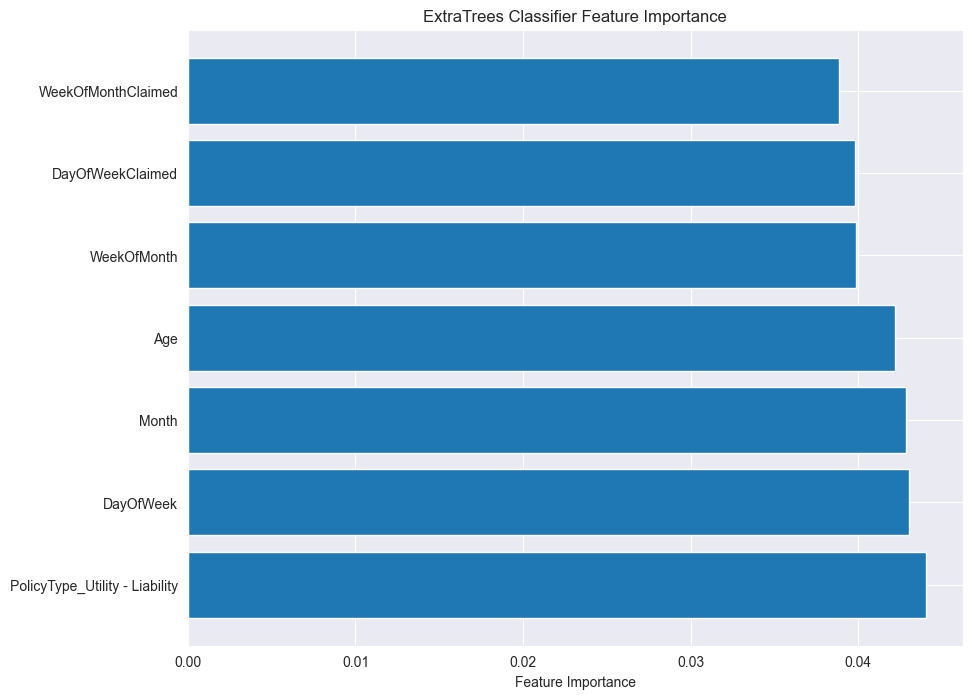

In [16]:
model = ExtraTreesClassifier()

X = df_onehot.drop(columns=['FraudFound_P'])
y = df_onehot['FraudFound_P']

model.fit(X, y)

feature_importance = model.feature_importances_

feature_names = df_onehot.columns

sorted_idx = feature_importance.argsort()[::-1]
sorted_idx = sorted_idx[1:8]

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('ExtraTrees Classifier Feature Importance')
plt.show()

In [17]:
X = df_onehot.drop(columns=['FraudFound_P'])[feature_names[sorted_idx]]
y = df_onehot['FraudFound_P']

# Feature Transformation

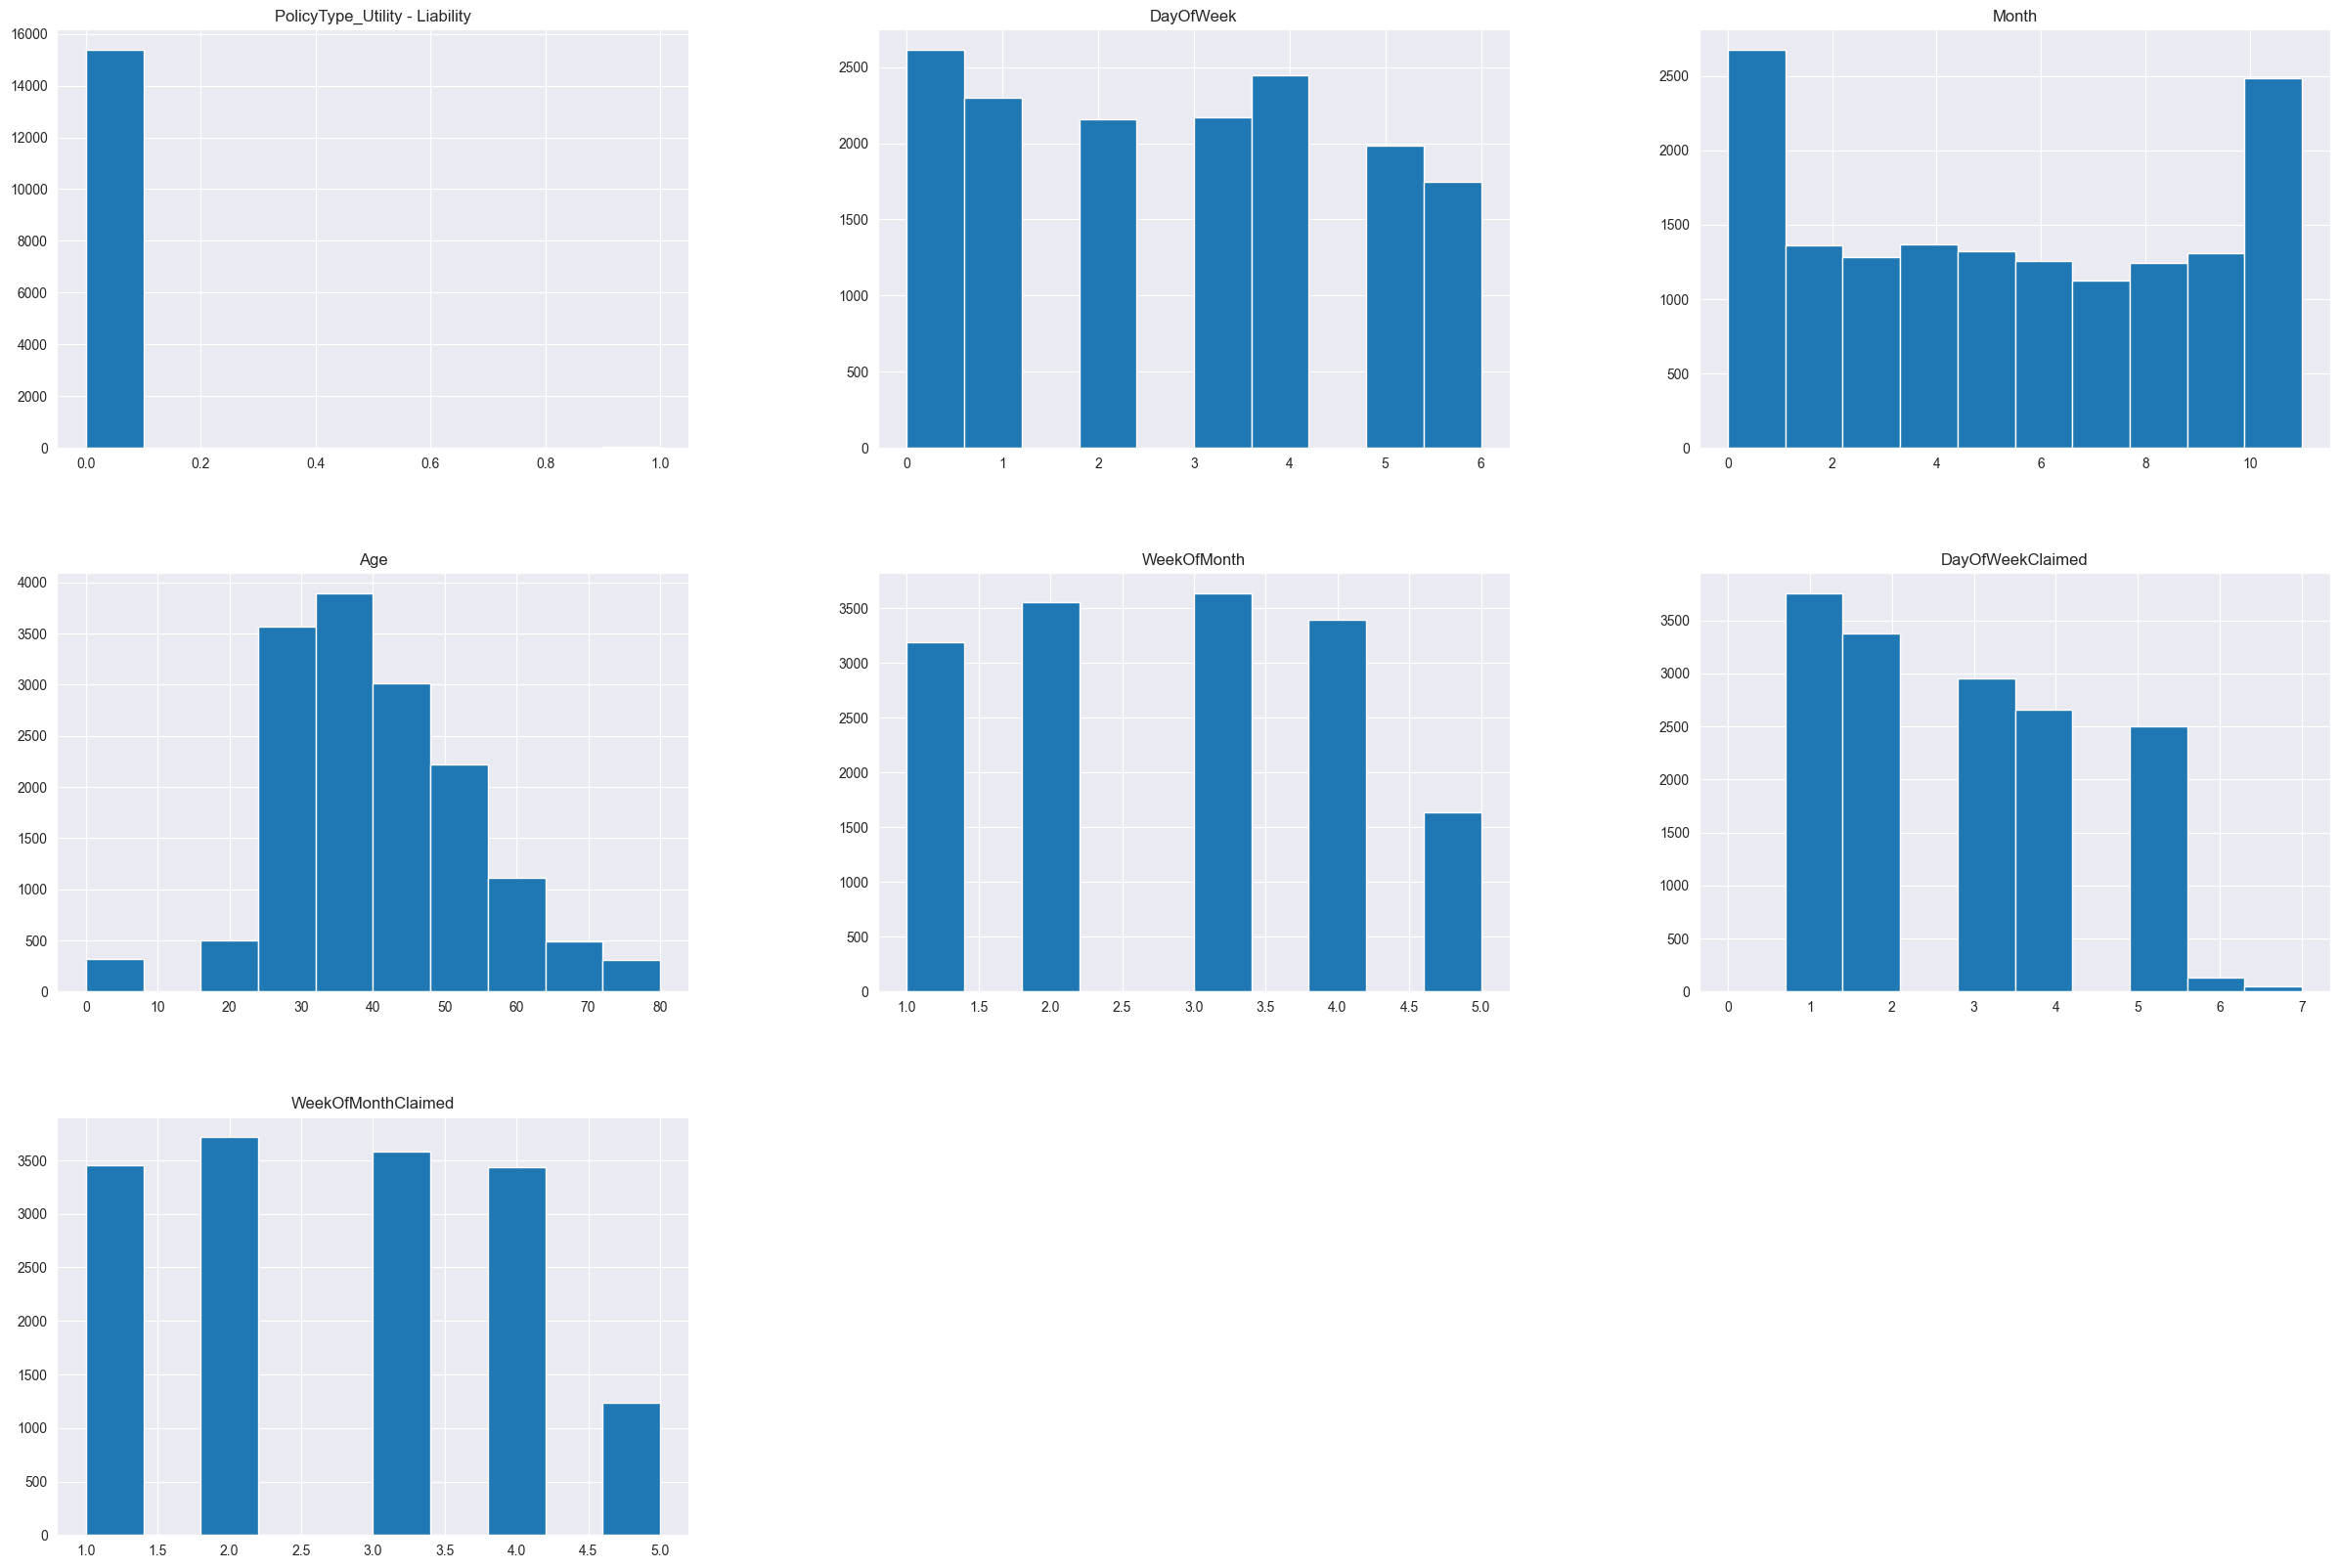

In [18]:
X.hist(figsize=(30,20))
plt.show()

# Handling Imbalance Data

In [19]:
ros = RandomOverSampler(random_state=SEED)
X_balance, y_balance = ros.fit_resample(X,y)

# Train Test Split

In [20]:
X_train, X_validation, y_train, y_validation = train_test_split(X_balance, y_balance, test_size=0.2,stratify=y_balance ,random_state=SEED)

# Model Selection

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9279, number of negative: 9277
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000812 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 18556, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500054 -> initscore=0.000216
[LightGBM] [Info] Start training from score 0.000216
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9279, number of negative: 9277
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105
[LightGBM] [Info] Number of data points in the train set: 18556, number of used features

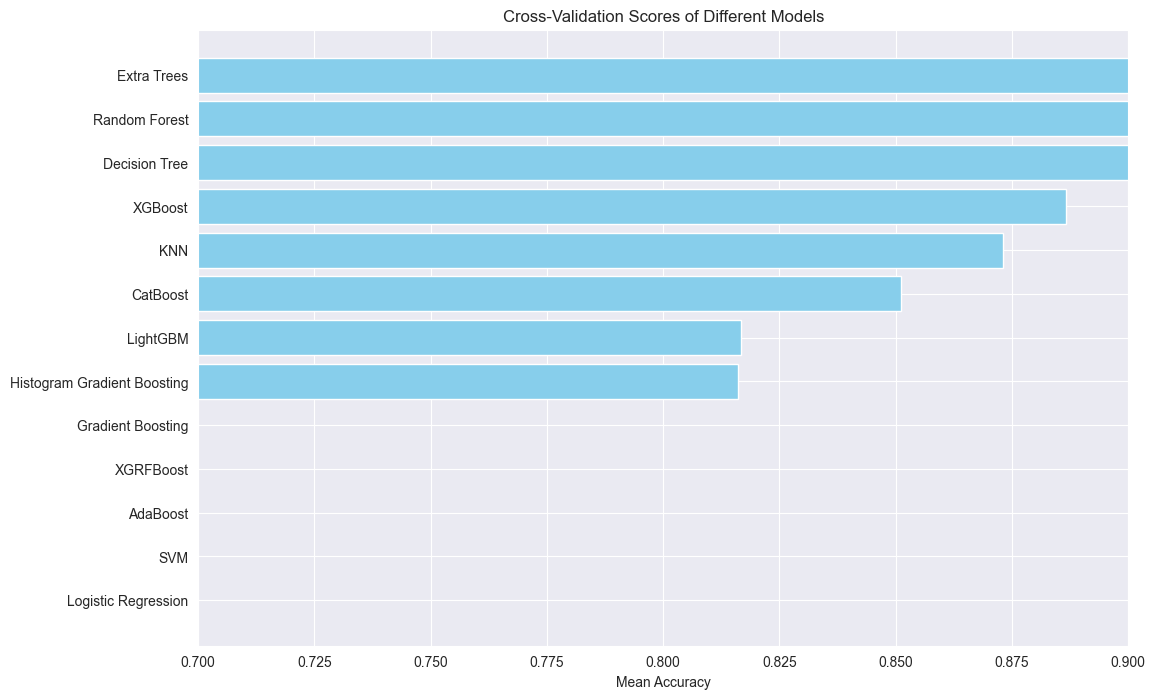

In [21]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Histogram Gradient Boosting': HistGradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0),
    'XGRFBoost': XGBRFClassifier(random_state=42)
}

results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[model_name] = cv_scores.mean()

sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

plt.figure(figsize=(12, 8))
plt.barh(list(sorted_results.keys()), list(sorted_results.values()), color='skyblue')
plt.xlabel('Mean Accuracy')
plt.title('Cross-Validation Scores of Different Models')
plt.xlim(0.7, 0.9)  # Adjusting limits for better visualization
plt.gca().invert_yaxis()  # Inverting y-axis to have the highest score at the top
plt.show()

# Hyperparameter Tuning

# Train Model

In [22]:
model = ExtraTreesClassifier(random_state=42)
model.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

# Model Evaluation

In [23]:
y_pred = model.predict(X_validation)

report = classification_report(y_validation, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2900
           1       0.97      1.00      0.99      2899

    accuracy                           0.99      5799
   macro avg       0.99      0.99      0.99      5799
weighted avg       0.99      0.99      0.99      5799


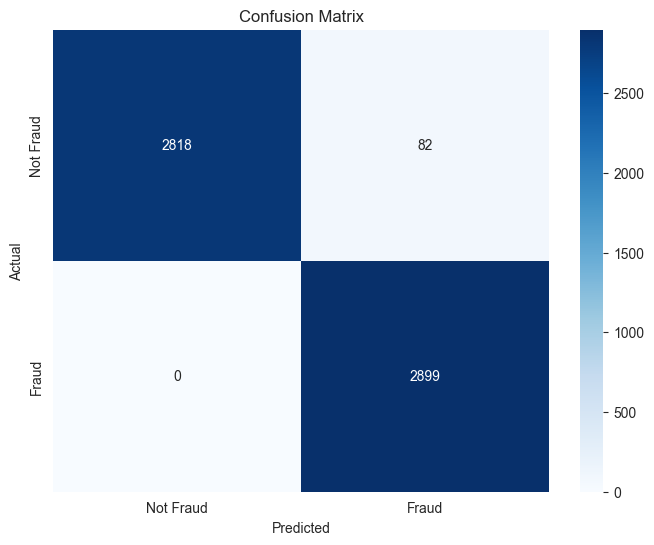

In [24]:
y_pred = model.predict(X_validation)
y_pred_prob = model.predict_proba(X_validation)[:, 1]  
cm = confusion_matrix(y_validation, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

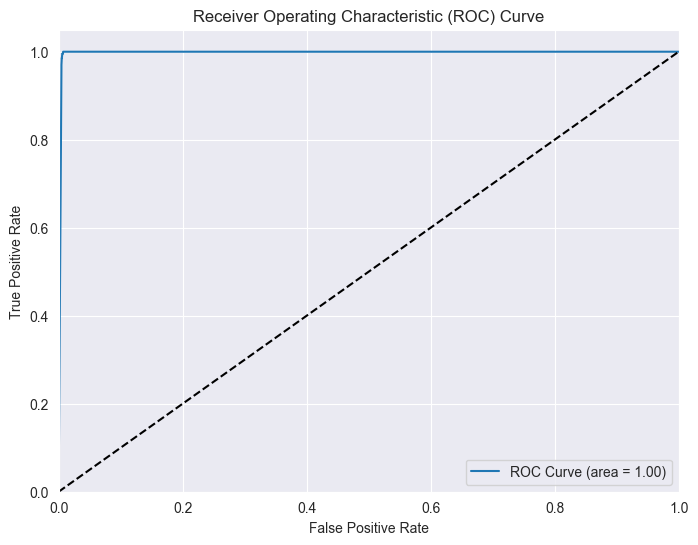

In [25]:
roc_auc = roc_auc_score(y_validation, y_pred_prob)

fpr, tpr, thresholds = roc_curve(y_validation, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save Model

In [26]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)